# Bài toán dự đoán doanh số bán hàng trong tương lai từ dữ liệu lịch sử giao dịch của nhà bán lẻ trực tuyến

# Bài toán dự đoán doanh số bán hàng trong tương lai từ dữ liệu lịch sử giao dịch của nhà bán lẻ trực tuyến

GVHD: LÊ HẰNG ANH

NHÓM SINH VIÊN THỰC HIỆN:
- LÊ ĐÌNH TÙNG
- NGUYỄN THỊ THUYÊN
- HUỲNH NGỌC TƯỜNG VI

## 1.Định nghĩa bài toán

### 1.1.Mục tiêu

Mục tiêu của nghiên cứu này là xây dựng một mô hình dự báo doanh số bán hàng trong tương lai dựa trên dữ liệu lịch sử giao dịch của nhà bán lẻ trực tuyến.
- Cung cấp ước lượng chính xác về doanh thu tương lai ở các mốc thời gian cụ thể.
- Hỗ trợ nhà quản lý trong việc lập kế hoạch tồn kho, định giá, quảng bá và phân phối nguồn lực hiệu quả hơn.
- Khai thác tiềm năng dữ liệu lớn trong thương mại điện tử nhằm tối ưu hóa các quyết định chiến lược và vận hành.

### 1.2.Bối cảnh kinh doanh

Trong bối cảnh thị trường thương mại điện tử tăng trưởng nhanh chóng, các doanh nghiệp bán lẻ đối mặt với thách thức trong việc duy trì chuỗi cung ứng hiệu quả và đáp ứng đúng nhu cầu thị trường. Dự đoán doanh số không chỉ giúp cân đối cung-cầu mà còn là cơ sở để tối ưu hóa chi phí, giảm thiểu rủi ro hàng tồn kho và nắm bắt cơ hội kinh doanh.

### 1.3.Giải pháp

Vấn đề hiện tại: Trong bối cảnh thương mại điện tử đang phát triển nhanh chóng, các nhà bán lẻ trực tuyến đối mặt với áp lực ngày càng lớn trong việc tối ưu hóa hoạt động kinh doanh, đặc biệt là việc dự báo nhu cầu và doanh số bán hàng. Việc dự báo không chính xác có thể dẫn đến mất cân bằng cung cầu: tồn kho quá mức gây lãng phí tài nguyên, trong khi thiếu hàng lại làm giảm trải nghiệm khách hàng và mất cơ hội doanh thu.

Chi phí liên quan: Theo báo cáo của McKinsey & Company, các công ty không có khả năng dự báo chính xác doanh số có thể bị thiệt hại lên đến 10-20% doanh thu hàng năm do các quyết định sai lệch về hàng tồn kho, chiến dịch marketing và phân phối nguồn lực. Trong khi đó, khả năng dự đoán chính xác có thể giúp cải thiện dòng tiền, giảm thiểu chi phí tồn kho và tăng mức độ hài lòng của khách hàng.

Tầm quan trọng: Một nghiên cứu của Gartner cho thấy rằng các doanh nghiệp bán lẻ có khả năng dự báo chính xác có thể cải thiện lợi nhuận hoạt động lên đến 20%. Ngoài ra, trong thời đại dữ liệu lớn, việc tận dụng dữ liệu giao dịch lịch sử để huấn luyện các mô hình học máy không chỉ nâng cao độ chính xác của dự báo mà còn giúp phát hiện những yếu tố ẩn sau ảnh hưởng đến hành vi mua hàng, từ đó đưa ra các chiến lược kinh doanh linh hoạt và hiệu quả hơn.

## 2.Các thư viện cần thiết

In [ ]:
pip install pmdarima

In [ ]:
# Thư viện cơ bản và xử lý dữ liệu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import os
import holidays
import matplotlib.dates as mdates

# Thư viện xử lý dữ liệu và tiền xử lý
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Thư viện cho mô hình học máy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA

# Thư viện học sâu và mô hình LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Thư viện cho Prophet và dự báo chuỗi thời gian
from prophet import Prophet

# Thư viện cho mô hình giải thích và giải thích kết quả
import shap
from sklearn.inspection import permutation_importance

# Thư viện cho đánh giá mô hình và phân tích kết quả
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Thư viện cho dự báo và phân tích chuỗi thời gian
import plotly.graph_objects as go
# Thư viện cảnh báo
warnings.filterwarnings('ignore')


## 3.Thu thập và khám phá dữ liệu

### 3.1.Tải và kiểm tra dữ liệu ban đầu

In [ ]:
df1 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
df2 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
df_ = pd.concat([df1, df2], ignore_index= True)
print(f"Dữ liệu đã được tải với {df_.shape[0]} dòng và {df_.shape[1]} cột.")

Dữ liệu đã được tải với 1067371 dòng và 8 cột.


In [ ]:
# IN ra ngẫu nhiên 5 mẫu
df_.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
948053,573096,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-10-27 14:40:00,1.65,14004.0,United Kingdom
521381,537823,82600,NO SINGING METAL SIGN,2,2010-12-08 14:25:00,4.21,NaN,United Kingdom
859414,566221,84568,GIRLS ALPHABET IRON ON PATCHES,10,2011-09-09 16:13:00,0.42,NaN,United Kingdom
423588,529850,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2010-10-31 13:35:00,4.95,16788.0,United Kingdom
274322,516110,21204,DAISIES HONEYCOMB GARLAND,6,2010-07-16 13:17:00,1.65,13211.0,United Kingdom


In [ ]:
# Thông tin cơ bản
print("===== THÔNG TIN CƠ BẢN =====")
print(df_.info())

===== THÔNG TIN CƠ BẢN =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None


Nhận xét


### 3.2.Kiểm tra chất lượng dữ liệu

In [ ]:
# Kiểm tra giá trị thiếu
print("===== KIỂM TRA GIÁ TRỊ THIẾU =====")
missing_values = df_.isnull().sum()
missing_percent = (missing_values / len(df_)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Số lượng', 'Phần trăm (%)']
print(missing_data[missing_data['Số lượng'] > 0])

===== KIỂM TRA GIÁ TRỊ THIẾU =====
             Số lượng  Phần trăm (%)
Description      4382       0.410541
Customer ID    243007      22.766873


Bộ dữ liệu không có giá trị thiếu

In [ ]:
# Thống kê mô tả cho biến số
print("===== THỐNG KÊ MÔ TẢ CHO BIẾN SỐ =====")
numeric_cols = df_.select_dtypes(include=['int64', 'float64']).columns
print(df_[numeric_cols].describe())

===== THỐNG KÊ MÔ TẢ CHO BIẾN SỐ =====
           Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000


In [ ]:
# Kiểm tra giá trị trùng lặp
duplicate_rows = df_[df_.duplicated(keep=False)]
print("===== GIÁ TRỊ TRÙNG LẶP =====")
print(duplicate_rows)
print(f"Tổng số dòng trùng lặp: {df_.duplicated().sum()}")


===== GIÁ TRỊ TRÙNG LẶP =====
        Invoice StockCode                        Description  Quantity  \
362      489517     21913     VINTAGE SEASIDE JIGSAW PUZZLES         1   
363      489517     21912           VINTAGE SNAKES & LADDERS         1   
365      489517     21821   GLITTER STAR GARLAND WITH BELLS          1   
367      489517     22319  HAIRCLIPS FORTIES FABRIC ASSORTED        12   
368      489517     22130   PARTY CONE CHRISTMAS DECORATION          6   
...         ...       ...                                ...       ...   
1067136  581538     22068        BLACK PIRATE TREASURE CHEST         1   
1067150  581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
1067153  581538     22992             REVOLVER WOODEN RULER          1   
1067160  581538     22694                       WICKER STAR          1   
1067162  581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

                InvoiceDate  Price  Customer ID         Country  
362     2009-12

In [ ]:
# Kiểm tra dữ liệu không hợp lệ
df_[df_['Quantity'] <= 0]
df_[df_['Price'] <= 0]
df_['Invoice'].str.startswith('C').sum()

19494

In [ ]:
# Kiểm tra phân bố theo thời gian
df_['InvoiceDate'].min(), df_['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

## 4.Tiền xử lý dữ liệu

### 4.1.Xử lý các vấn đề tồn đọng

In [ ]:
# Tạo bản sao để tránh thay đổi dữ liệu gốc
df = df_.copy()

In [ ]:
# Chuyển đổi InvoiceDate về dạng y-m-d h-m-s
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter out data for December 2009 and December 2011
df = df[~((df['InvoiceDate'].dt.year == 2009) & (df['InvoiceDate'].dt.month == 12))]
df = df[~((df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month == 12))]


In [ ]:
# Xử lý cột Customer ID - do dự đoán theo đơn hàng, không quan tâm ai mua
for col in ['Customer ID']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [ ]:
# Replace missing values in the 'Description' column with 'Unknown'
if 'Description' in df.columns:
    df['Description'].fillna('Unknown', inplace=True)


In [ ]:
# Kiểm tra giá trị NaN sau khi chuyển đổi
print(f"Số giá trị NaN trong InvoiceDate: {df['InvoiceDate'].isna().sum()}")


Số giá trị NaN trong InvoiceDate: 0


In [ ]:
# Sử dụng IQR tìm ngưỡng ngoại lệ
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Thay giá trị ngoại lệ bằng ngưỡng
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


# Xử lý dữ liệu
def retail_data_prep(dataframe):
    dataframe.dropna(inplace=True)      # Xóa  giá trị thiếu
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]    # Loại bỏ các sản phẩm bị hủy
    dataframe = dataframe[dataframe["Quantity"] > 0]      # Số lượng > 0
    dataframe = dataframe[dataframe["Price"] > 0]         # Doanh thu > 0
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe
df = retail_data_prep(df)

In [ ]:
# Kiểm tra lại giá trị thiếu
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Country,0


In [ ]:
# Thống kê mô tả lại cho các biến số
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].describe().T)

             count      mean        std    min   25%  50%    75%      max
Quantity  972601.0  9.725575  22.310686  1.000  1.00  3.0  12.00  248.500
Price     972601.0  3.399731   4.069889  0.001  1.25  2.1   4.13   44.565


### 4.2.Tạo các đặc trưng mới

In [ ]:
# Tạo biến 'Date': chỉ lấy phần ngày (loại bỏ giờ, phút, giây)
df['Date'] = df['InvoiceDate'].dt.floor('D')

# Tạo biến 'Month': chuyển đổi thành định dạng tháng (Period)
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Month_int'] = df['InvoiceDate'].dt.month #

# Quý trong năm (1-4)
df['Quarter'] = df['InvoiceDate'].dt.quarter

# các năm
df['Year'] = df['InvoiceDate'].dt.year
# Tạo biến 'DayofWeek': lấy tên ngày trong tuần
df['DayofWeek'] = df['InvoiceDate'].dt.day_name()

# Tạo biến 'Hour': lấy giờ trong ngày (0 đến 23)
df['Hour'] = df['InvoiceDate'].dt.hour

# tính tổng doanh số
df['TotalAmount']=df['Quantity']*df['Price']


In [ ]:
df.sample()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Date,Month,Month_int,Quarter,Year,DayofWeek,Hour,TotalAmount
545152,537885,22429,ENAMEL MEASURING JUG CREAM,4.0,2010-12-09 09:34:00,4.25,United Kingdom,2010-12-09,2010-12,12,4,2010,Thursday,9,17.0


## 5.EDA - Phân tích khám phá dữ liệu

### 5.1.Phân tích doanh số theo ngày

In [ ]:

# Nhóm theo ngày, tính tổng số lượng bán
daily_sales = df.groupby('Date')['Quantity'].sum()

# Lấy ngày có số lượng bán ra cao nhất
top_day = daily_sales.nlargest(1)

# Tạo biểu đồ tương tác
fig = go.Figure()

# Vẽ biểu đồ đường cho số lượng bán ra theo ngày
fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines+markers', name='Số lượng bán ra theo ngày'))

# Thêm điểm cao nhất vào biểu đồ
for date, sales in top_day.items():
    date_str = date.strftime('%Y-%m-%d')  # Chuyển đổi ngày sang định dạng chuỗi
    fig.add_trace(go.Scatter(
        x=[date], y=[sales],
        mode='markers+text',
        textposition='top center',
        marker=dict(color='red', size=10),
        name=f'Đỉnh cao nhất ({date_str})'
    ))

# Cập nhật layout của biểu đồ
fig.update_layout(
    title='Tổng số lượng sản phẩm bán ra theo ngày (Điểm cao nhất)',
    xaxis_title='Ngày',
    yaxis_title='Số lượng bán ra',
    template='plotly_white',
    hovermode='closest'
)

# Hiển thị biểu đồ
fig.show()


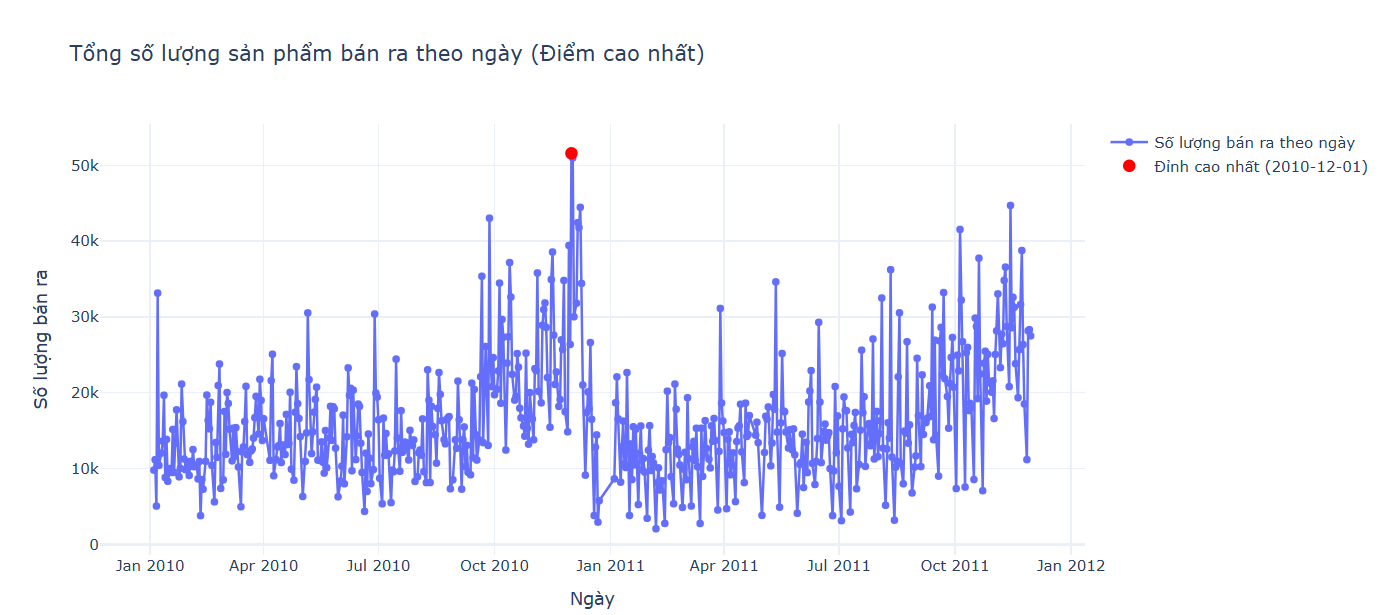

+ Xu hướng chung tăng dần theo thời gian

 - Từ đầu năm 2010 đến cuối năm 2011, mức độ biên động của doanh số ngày càng lớn, với nhiều đỉnh và đáy rõ rệt. Điều này cho thấy quy mô thị trường và khối lượng giao dịch có xu hướng gia tăng, có thể do sự mở rộng khách hàng, quảng bá thương hiệu hay các chiến dịch khuyến mãi.

+ Tính mùa vụ (seasonality)
  - Đa số các ngọn đỉnh cao nhất tập trung vào các tháng cuối năm (cuối quý 3, quý 4), đặc biệt quanh tháng 9–12 của năm 2010 và 2011. Ví dụ:

  - Ngày 2 tháng 12 2010 và 1 tháng 12 2010 là hai ngày có doanh số lớn nhất, có thể liên quan đến các chương trình khuyến mãi mùa đông hoặc chuẩn bị cho lễ Giáng Sinh.

  - Ngày 27 tháng 9 2010 và 8 tháng 12 2010 cũng nằm trong nhóm “đỉnh” cuối năm, càng khẳng định mùa cao điểm mua sắm rơi vào thời gian này.

+ Các điểm bất thường (outliers)
  - Một vài ngày giữa năm cũng có đột biến (ví dụ ngày 27 tháng 9 2010 hay ngày 10 tháng 10 2010), có thể do chiến dịch marketing đặc biệt, sự kiện flash sale hoặc đơn hàng lớn bị gộp vào một ngày.

+ Biên độ dao động lớn
  - Cột “Số lượng bán ra theo ngày” có khuynh hướng từ khoảng 5 000–10 000 mặt hàng/ngày ở giai đoạn đầu 2010, đến trên 20 000–30 000/ngày vào cuối 2011. Biên độ và tần suất các đỉnh càng dày đặc cho thấy hoạt động kinh doanh ngày càng sôi động.

### 5.2.phân tích doanh số theo thời gian

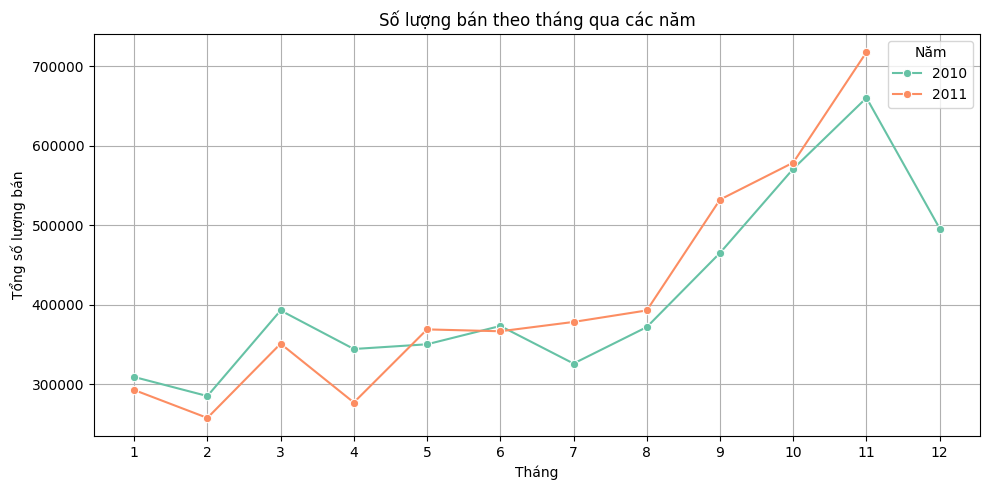

In [ ]:
# Tổng doanh số theo tháng của từng năm
monthly_sales_amount = df.groupby(['Year', 'Month_int'])['TotalAmount'].sum().reset_index()
monthly_sales_quantity = df.groupby(['Year', 'Month_int'])['Quantity'].sum().reset_index()

# Chọn bảng màu (ở đây chọn palette Set2)
custom_palette = sns.color_palette("Set2")
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_sales_quantity,x='Month_int', y='Quantity', hue='Year', marker='o',palette=custom_palette)

plt.title('Số lượng bán theo tháng qua các năm')
plt.xlabel('Tháng')
plt.ylabel('Tổng số lượng bán')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Năm')
plt.tight_layout()
plt.show()


1. Giai đoạn ổn định ban đầu (01/2010 – 04/2010):
- Số lượng bán dao động nhẹ, nằm trong khoảng 280,000 – 300,000 đơn vị.
- Giai đoạn này thể hiện mức tiêu thụ ổn định, không có đột biến đáng kể. Có thể đây là giai đoạn chưa có chiến dịch tiếp thị lớn, hoặc đang trong mùa thấp điểm.
2. Giai đoạn dao động nhẹ và phục hồi (05/2010 – 08/2010):
- Tháng 5/2010 ghi nhận mức tăng nhẹ (~ 350,000), sau đó tiếp tục tăng đến khoảng 370,000 vào tháng 6, rồi giảm xuống mức thấp hơn vào tháng 7 (~320,000).- Sự dao động này gợi ý tính chu kỳ hoặc ảnh hưởng của các chiến dịch bán hàng ngắn hạn (ví dụ: khuyến mãi mùa hè), nhưng chưa có xu hướng rõ ràng.

3. Giai đoạn tăng trưởng mạnh (09/2010 – 11/2010):
- Tháng 9–11/2010 chứng kiến một sự gia tăng rõ rệt, từ ~460,000 lên ~600,000 đơn vị trong 3 tháng liên tiếp.
- Đây là điểm bùng nổ doanh số, có thể do các chương trình khuyến mãi lớn, nhu cầu mua sắm cao dịp cuối năm hoặc sự ra mắt sản phẩm mới.
- Đây là mùa cao điểm đầu tiên trong chuỗi thời gian.
4. Sự suy giảm sau cao điểm (12/2010 – 02/2011):
- Tháng 12/2010 và đầu năm 2011 chứng kiến sự giảm mạnh về lượng bán (~430,000 vào tháng 12, xuống khoảng 260,000 vào tháng 2/2011).
- Đây có thể là hiệu ứng tất yếu sau mùa cao điểm, đồng thời phản ánh tính mùa vụ thường thấy: sau dịp lễ người tiêu dùng chi tiêu ít lại.
5. Phục hồi và ổn định giữa năm (03/2011 – 08/2011):
- Từ tháng 3 đến tháng 8/2011, lượng bán dao động từ 330,000 đến 380,000 đơn vị.
- Mặc dù không tăng đột biến, nhưng duy trì mức tiêu thụ ổn định cho thấy thị trường đã phục hồi và chuẩn bị bước vào mùa cao điểm tiếp theo.
6. Tăng trưởng đột phá lần thứ hai (09/2011 – 11/2011):
- Tăng vọt từ ~520,000 vào tháng 9 lên tới đỉnh 640,000 vào tháng 11/2011.
- Đáng chú ý là mức tăng trưởng này mạnh hơn và sớm hơn so với cùng kỳ năm 2010, cho thấy năm 2011 đã đạt được kết quả kinh doanh vượt trội.
- Điều này phản ánh sự cải thiện trong chiến lược bán hàng, năng lực cung ứng hoặc sự mở rộng thị trường.

=> Kết luận:
- Cần định kỳ hóa các chiến dịch khuyến mãi vào (tháng 9–11), vì đây là giai đoạn có tiềm năng bán hàng cao nhất mỗi năm.

- Tạo các chương trình giữ chân khách hàng sau dịp lễ, đặc biệt trong tháng 12 và các tháng đầu năm sau – nơi mức tiêu thụ sụt giảm mạnh.

- Năm 2011 có xu hướng tăng trưởng tốt hơn năm 2010, cho thấy các điều chỉnh chiến lược trong năm này có hiệu quả – cần phân tích sâu yếu tố thành công để nhân rộng.

- Tối ưu tồn kho & cung ứng từ tháng 8 để chuẩn bị cho nhu cầu cao từ tháng 9 trở đi.

### 5.3.phân tích doanh số theo sản phẩm

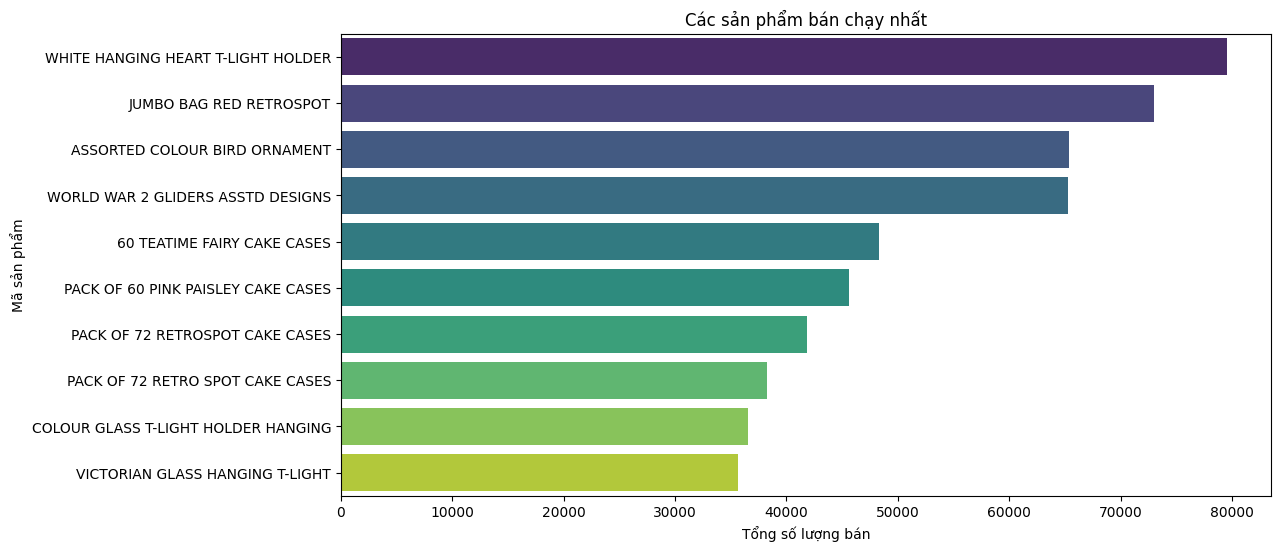

In [ ]:
# Sản phẩm bán chạy nhất
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')

# Đặt tên tiêu đề và nhãn trục x, y
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Mã sản phẩm')
plt.title('Các sản phẩm bán chạy nhất')

plt.show()

Biểu đồ thể hiện top 10 sản phẩm bán chạy nhất của nhà bán lẻ trực tuyến theo tổng số lượng bán ra. Phân tích mô tả sản phẩm cho thấy phần lớn các mặt hàng thuộc về hai nhóm chính: đồ trang trí và dụng cụ làm bánh.

- Nhóm đồ trang trí gồm các sản phẩm như WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT và COLOUR GLASS T-LIGHT HOLDER HANGING. Các sản phẩm này thường mang yếu tố thẩm mỹ, được thiết kế để trang trí nhà cửa, không gian tiệc hoặc làm quà tặng. Việc các sản phẩm này xuất hiện nhiều trong danh sách bán chạy cho thấy xu hướng tiêu dùng thiên về nhu cầu làm đẹp không gian sống, đặc biệt trong các dịp lễ, tiệc tại gia.

- Nhóm thứ hai là dụng cụ làm bánh, với các sản phẩm như PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES, 60 TEATIME FAIRY CAKE CASES. Đây là các mặt hàng giá trị nhỏ, tiêu hao theo lần sử dụng và thường được mua theo lô. Sự xuất hiện của nhóm này phản ánh hành vi tiêu dùng hướng đến tổ chức tiệc tại nhà, nấu nướng cá nhân hoặc kinh doanh hộ gia đình nhỏ lẻ.

- Ngoài ra, một số sản phẩm thuộc các nhóm riêng lẻ như túi đựng (JUMBO BAG RED RETROSPOT) và bộ đồ thủ công (MINI PAINT SET VINTAGE) cho thấy có sự hiện diện của các mặt hàng phục vụ sinh hoạt và giải trí nhẹ nhàng. Sự đa dạng của các nhóm sản phẩm trong top bán chạy, tuy nhiên, vẫn xoay quanh nhu cầu cá nhân hóa không gian sống và hoạt động thủ công mang tính cá nhân.

- Tóm lại, biểu đồ cho thấy khách hàng tập trung vào các sản phẩm nhỏ, giá trị thấp, mang tính thẩm mỹ và tiện lợi cao. Nhóm đối tượng mục tiêu có thể là phụ nữ, gia đình trẻ, hoặc các cá nhân yêu thích trang trí và hoạt động thủ công tại nhà. Đây là những insight quan trọng có thể định hướng chiến lược tiếp thị và quản lý hàng tồn kho trong các giai đoạn cao điểm nhu cầu như lễ hội, mùa cưới, hoặc Giáng sinh.

### 5.4.phân tích doanh số theo quốc gia

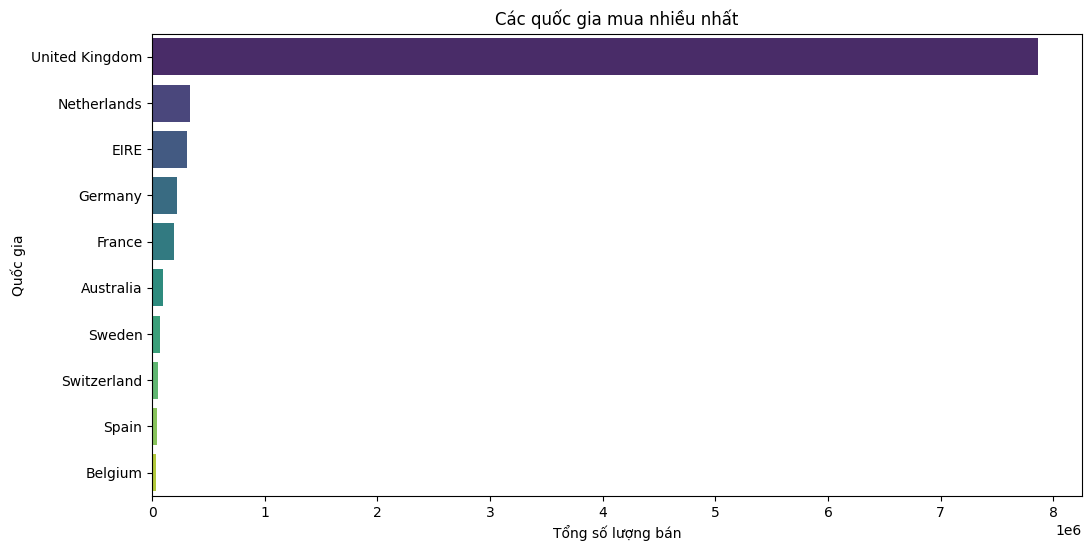

In [ ]:
# Các quốc gia có doanh số bán hàng cao nhất ngoại trừ United Kingdom
top_countries =df.groupby('Country')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Đặt tên tiêu đề và nhãn trục x, y
plt.xlabel('Tổng số lượng bán')
plt.ylabel('Quốc gia')
plt.title('Các quốc gia mua nhiều nhất')
plt.show()

- Doanh thu từ UK vượt trội, cao hơn nhiều lần so với các quốc gia khác, chiếm phần lớn doanh thu trong bộ dữ liệu.
- Điều này cho thấy công ty có thị trường chủ yếu tại Anh, có thể do cơ sở hoạt động chính đặt tại đây, hoặc khách hàng trong nước chiếm ưu thế.
- Netherlands và EIRE có doanh thu tương đối cao sau UK, cho thấy đây có thể là thị trường phụ nhưng vẫn đóng vai trò quan trọng.
- Nếu doanh nghiệp muốn mở rộng kinh doanh, hai thị trường này có thể là điểm nhắm tiếp theo.
- Số lượng đơn hàng có thể thấp nhưng giá trị đơn hàng cao, tức là khách hàng tại đây thích mua hàng cao cấp hơn số lượng lớn.
- Có thể doanh nghiệp chưa khai thác hết thị trường này, nên quảng bá thương hiệu và tối ưu hóa chiến lược tiếp thị có thể thúc đẩy doanh thu.
- Nhật Bản & Tây Ban Nha có doanh thu thấp, có thể do: Ít nhận diện thương hiệu tại khu vực này. Chi phí vận chuyển cao, khiến khách hàng ít đặt hàng hơn. Sản phẩm chưa phù hợp với nhu cầu tiêu dùng tại đây.



## 6.Xây dựng và đánh giá mô hình

### 6.1.Huấn luyện và đánh giá mô hình

### 6.1Chuẩn bị dữ liệu

In [ ]:
## ==================== PHẦN 1: CHUẨN BỊ DỮ LIỆU (SỬ DỤNG DF CÓ SẴN) ====================
def prepare_data_from_existing(df):
    """Sử dụng các biến đã tạo sẵn trong df"""
    # Tạo DataFrame tổng hợp theo ngày - sử dụng cột Date có sẵn
    daily_data = df.groupby('Date').agg({
        'Quantity': 'sum',
        'Month': 'first',
        'Quarter': 'first',
        'Year': 'first',
        'DayofWeek': 'first',
        'Hour': 'mean'
    }).reset_index()

    # Đổi tên cột theo yêu cầu của Prophet
    daily_data.columns = ['ds', 'y', 'month', 'quarter', 'year', 'dayofweek', 'hour']

    # Đảm bảo ds là datetime
    daily_data['ds'] = pd.to_datetime(daily_data['ds'])

    # Làm mịn dữ liệu và log transform
    daily_data['y'] = np.log1p(daily_data['y'].rolling(window=7, min_periods=1, center=True).mean())
    daily_data.dropna(inplace=True)

    # Thêm các đặc trưng phụ trợ từ cột ds
    daily_data['day_of_week'] = daily_data['ds'].dt.dayofweek
    daily_data['day_of_month'] = daily_data['ds'].dt.day
    daily_data['day_of_year'] = daily_data['ds'].dt.dayofyear
    daily_data['Month_int'] = daily_data['ds'].dt.month
    daily_data['Quarter'] = daily_data['ds'].dt.quarter

    # Thêm thông tin ngày lễ UK
    years = daily_data['ds'].dt.year.unique()
    uk_holidays = holidays.UnitedKingdom(years=years)
    daily_data['is_holiday'] = daily_data['ds'].apply(lambda x: 1 if x in uk_holidays else 0)

    return daily_data

# Chia train/test (80/20)
def split_data(data, train_size=0.8):
    """Chia dữ liệu thành tập train và test"""
    split_idx = int(len(data) * train_size)
    train = data.iloc[:split_idx].copy()
    test = data.iloc[split_idx:].copy()
    return train, test


### 6.2.Xây dựng mô hình

In [ ]:

## ==================== PHẦN 2: MÔ HÌNH PROPHET ====================
def train_prophet(train_data):
    """Huấn luyện mô hình Prophet với dữ liệu có sẵn"""
    model = Prophet(
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=2,
        seasonality_mode='multiplicative',
        weekly_seasonality=True,
        yearly_seasonality=False,
        daily_seasonality=True,
        uncertainty_samples=1000
    )

    # Thêm seasonality tùy chỉnh
    model.add_seasonality(name='yearly', period=365.25, fourier_order=5)

    # Thêm ngày lễ
    try:
        years = train_data['ds'].dt.year.unique()
        uk_holidays = holidays.UnitedKingdom(years=years)
        holidays_df = pd.DataFrame([{
            'ds': pd.to_datetime(date),
            'holiday': name,
            'lower_window': -1,
            'upper_window': 1
        } for date, name in uk_holidays.items()])
        model.holidays = holidays_df
    except Exception as e:
        print(f"Lỗi khi tải ngày lễ: {e}")

    # Chỉ sử dụng các cột ds và y cho Prophet
    prophet_data = train_data[['ds', 'y']].copy()
    model.fit(prophet_data)
    return model

def evaluate_prophet(model, train_data, test_data):
    """Đánh giá mô hình Prophet"""
    # Tạo future dataframe bao gồm cả thời gian test
    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)

    # Chỉ lấy phần dự báo tương ứng với tập test
    test_forecast = forecast.iloc[-len(test_data):][['ds', 'yhat']]

    # Chuyển đổi kết quả (đảo ngược log transform)
    test_data['y_true'] = np.expm1(test_data['y'])
    test_forecast['yhat'] = np.expm1(test_forecast['yhat'])

    # Đảm bảo thứ tự dữ liệu khớp nhau
    test_forecast = test_forecast.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    # Tính metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(test_data['y_true'], test_forecast['yhat'])),
        'MAE': mean_absolute_error(test_data['y_true'], test_forecast['yhat']),
        'R2': r2_score(test_data['y_true'], test_forecast['yhat'])
    }

    return test_forecast['yhat'], metrics

# Phần Linear Regression đã được xóa theo yêu cầu

## ==================== PHẦN 3: MÔ HÌNH LSTM ====================
def create_lstm_model(train_data, test_data, look_back=7):
    """Huấn luyện mô hình LSTM với dữ liệu đa biến"""
    # Chọn các đặc trưng phù hợp cho LSTM
    features = ['y', 'day_of_week', 'Month_int', 'is_holiday']
    if 'hour' in train_data.columns:
        features.append('hour')

    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train = scaler.fit_transform(train_data[features])
    scaled_test = scaler.transform(test_data[features])

    # Tạo dataset với look_back cho mô hình LSTM
    def create_dataset(data, look_back=1):
        X, y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:(i + look_back), :])  # Lấy 'look_back' bước thời gian
            y.append(data[i + look_back, 0])      # Dự đoán giá trị 'y' của bước tiếp theo
        return np.array(X), np.array(y)

    X_train, y_train = create_dataset(scaled_train, look_back)
    X_test, y_test = create_dataset(scaled_test, look_back)

    # Xây dựng mô hình LSTM
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, len(features))),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Callbacks
    callbacks = [
        EarlyStopping(patience=7, restore_best_weights=True),
        ModelCheckpoint('best_lstm.keras', save_best_only=True)
    ]

    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_split=0.2, callbacks=callbacks, verbose=1)

    # Dự đoán
    test_pred = model.predict(X_test)

    # Đảo ngược chuẩn hóa
    test_pred_inverse = np.zeros((len(test_pred), len(features)))
    test_pred_inverse[:, 0] = test_pred.flatten()

    y_test_inverse = np.zeros((len(y_test), len(features)))
    y_test_inverse[:, 0] = y_test

    test_pred_transformed = scaler.inverse_transform(test_pred_inverse)[:, 0]
    y_test_transformed = scaler.inverse_transform(y_test_inverse)[:, 0]

    # Đảo ngược log transformation
    test_pred_final = np.expm1(test_pred_transformed)
    y_test_final = np.expm1(y_test_transformed)

    # Tính metrics
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test_final, test_pred_final)),
        'MAE': mean_absolute_error(y_test_final, test_pred_final),
        'R2': r2_score(y_test_final, test_pred_final)
    }

    return model, test_pred_final, metrics

## ==================== PHẦN 4: MÔ HÌNH RANDOM FOREST ====================
def train_random_forest(X_train, y_train, X_test):
    """Huấn luyện mô hình Random Forest Regressor"""

    # Xác định các cột đặc trưng
    numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
    # Loại bỏ các cột không cần thiết
    if 'y' in numerical_features:
        numerical_features.remove('y')
    if 'ds' in numerical_features:
        numerical_features.remove('ds')

    # Kiểm tra xem có cột phân loại không
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'ds' in categorical_features:
        categorical_features.remove('ds')

    # Chuẩn bị preprocessor
    transformers = []
    if numerical_features:
        transformers.append(('num', StandardScaler(), numerical_features))
    if categorical_features:
        transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features))

    # Tạo ColumnTransformer và Pipeline
    if transformers:
        preprocessor = ColumnTransformer(transformers=transformers)

        # Random Forest Regressor
        pipeline = Pipeline(steps=[
            ('preprocessing', preprocessor),
            ('regressor', RandomForestRegressor(random_state=42))
        ])

        # GridSearchCV để tìm tham số tối ưu (đơn giản hóa lưới tham số)
        param_grid = {
            'regressor__n_estimators': [100, 200],
            'regressor__max_depth': [10, 20]
        }

        grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
        print("Fitting Random Forest model...")
        grid_search.fit(X_train, y_train)

        print(f"Best parameters: {grid_search.best_params_}")

        # Dự đoán
        preds = grid_search.predict(X_test)

        # Đảo ngược log transformation
        preds = np.expm1(preds)
        y_test_true = np.expm1(X_test['y'])

        # Tính metrics
        metrics = {
            'RMSE': np.sqrt(mean_squared_error(y_test_true, preds)),
            'MAE': mean_absolute_error(y_test_true, preds),
            'R2': r2_score(y_test_true, preds)
        }

        return grid_search.best_estimator_, preds, metrics
    else:
        print("Không có đặc trưng phù hợp cho Random Forest")
        return None, None, None


### 6.3. huấn luyện mô hình

In [ ]:

## ==================== PHẦN 6: CHẠY MÔ HÌNH ====================
def run_models(df):
    # Bước 1: Chuẩn bị dữ liệu
    print("Chuẩn bị dữ liệu ...")
    data = prepare_data_from_existing(df)
    train, test = split_data(data)

    # Hiển thị thông tin cơ bản
    print(f"Kích thước tập huấn luyện: {train.shape}")
    print(f"Kích thước bộ kiểm tra: {test.shape}")

    results = {}

    # Bước 2: Huấn luyện và đánh giá mô hình Prophet
    print("\nHuấn luyện mô hình Prophet...")
    prophet_model = train_prophet(train)
    prophet_pred, metrics_prophet = evaluate_prophet(prophet_model, train, test)
    results['Prophet'] = metrics_prophet
    print(f"Prophet metrics: {metrics_prophet}")

    # Bước 3: Huấn luyện và đánh giá mô hình LSTM
    print("\nHuấn luyện mô hình LSTM...")
    lstm_model, lstm_pred, metrics_lstm = create_lstm_model(train, test)
    results['LSTM'] = metrics_lstm
    print(f"LSTM metrics: {metrics_lstm}")

    # Bước 4: Huấn luyện và đánh giá mô hình Random Forest
    print("\nHuấn luyện mô hình Random Forest...")
    rf_model, rf_pred, metrics_rf = train_random_forest(train, train['y'], test)
    if rf_model is not None:
        results['Random Forest'] = metrics_rf
        print(f"Random Forest metrics: {metrics_rf}")

    # Bước 5: So sánh các mô hình
    print("\nSo sánh Model :")
    metrics_df = pd.DataFrame(results).T
    print(metrics_df)

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(12, 8))

    # Subplot cho RMSE
    plt.subplot(2, 2, 1)
    metrics_df['RMSE'].plot(kind='bar')
    plt.title('So sánh RMSE giữa các mô hình')
    plt.ylabel('RMSE')

    # Subplot cho MAE
    plt.subplot(2, 2, 2)
    metrics_df['MAE'].plot(kind='bar')
    plt.title('So sánh MAE giữa các mô hình')
    plt.ylabel('MAE')

    # Subplot cho R2
    plt.subplot(2, 2, 3)
    metrics_df['R2'].plot(kind='bar')
    plt.title('So sánh R² giữa các mô hình')
    plt.ylabel('R²')

    # Subplot cho kết quả dự báo
    plt.subplot(2, 2, 4)
    plt.plot(test['ds'], test['y_true'], label='Actual')
    plt.plot(test['ds'], prophet_pred, label='Prophet')
    # plt.plot(test['ds'], lr_pred, label='Linear Regression')

    # Adjust the indexing for lstm_pred to match the length of test['ds']
    plt.plot(test['ds'][-len(lstm_pred):], lstm_pred, label='LSTM') #Change is here

    if rf_pred is not None:
        plt.plot(test['ds'], rf_pred, label='Random Forest')
    plt.title(' So sánh kết quả dự báo giữa các mô hình')
    plt.legend()
    plt.xticks(rotation=45)  # Xoay trục hoành 90 độ
    plt.tight_layout()
    plt.show()
    return {
        'prophet': prophet_model,
        # 'linear_regression': lr_model,
        'lstm': lstm_model,
        'random_forest': rf_model,
        'metrics': metrics_df
    }



### 6.4. so sánh và đánh giá kết quả

Chuẩn bị dữ liệu ...
Kích thước tập huấn luyện: (460, 13)
Kích thước bộ kiểm tra: (115, 13)

Huấn luyện mô hình Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp2vui3gbb/bx6qpww4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2vui3gbb/xdsl9lcn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8374', 'data', 'file=/tmp/tmp2vui3gbb/bx6qpww4.json', 'init=/tmp/tmp2vui3gbb/xdsl9lcn.json', 'output', 'file=/tmp/tmp2vui3gbb/prophet_modelm62a_6xk/prophet_model-20250508025051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:50:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:50:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: {'RMSE': np.float64(2906.5421381367782), 'MAE': 2405.1472905091728, 'R2': 0.6506674454936765}

Huấn luyện mô hình LSTM...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0924 - val_loss: 0.0261
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - val_loss: 0.0082
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0163 - val_loss: 0.0084
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0134 - val_loss: 0.0058
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - val_loss: 0.0060
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0095 - val_loss: 0.0056
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0099 - val_loss: 0.0061
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0110 - val_loss: 0.0058
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - val_loss: 0.0054
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - val_loss: 0.0053


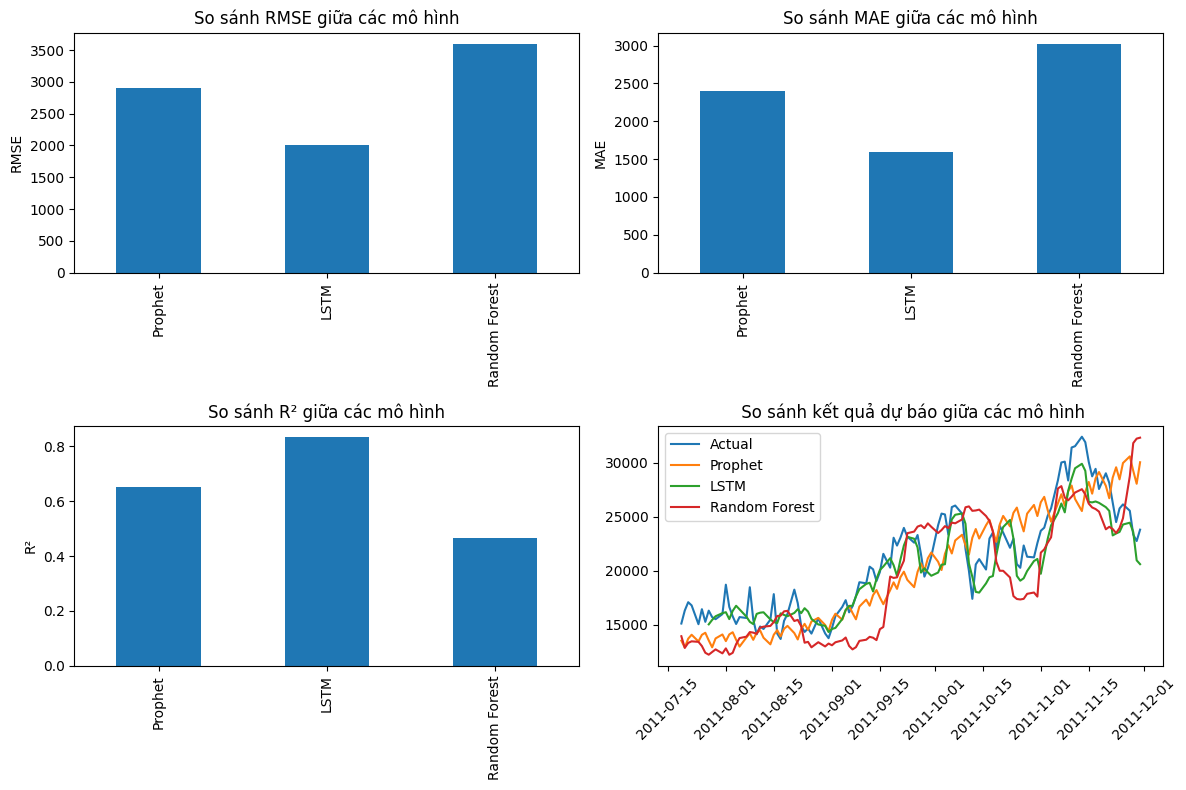

In [ ]:
# Để sử dụng, chỉ cần gọi hàm này với DataFrame có sẵn của bạn
models = run_models(df)

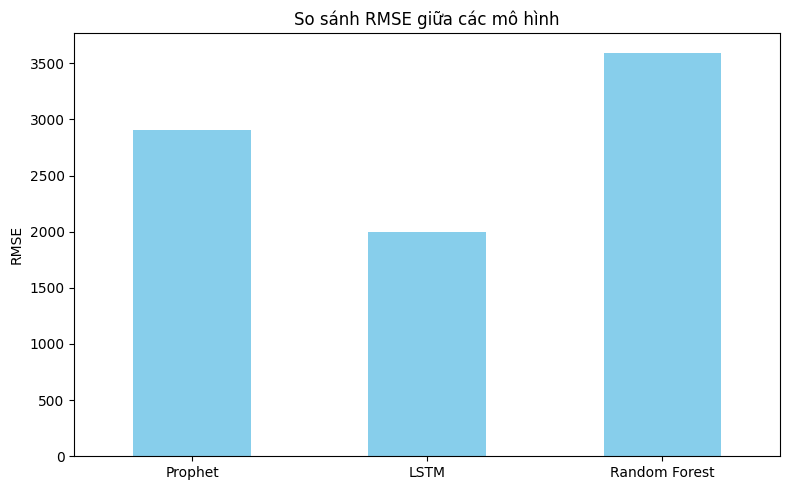

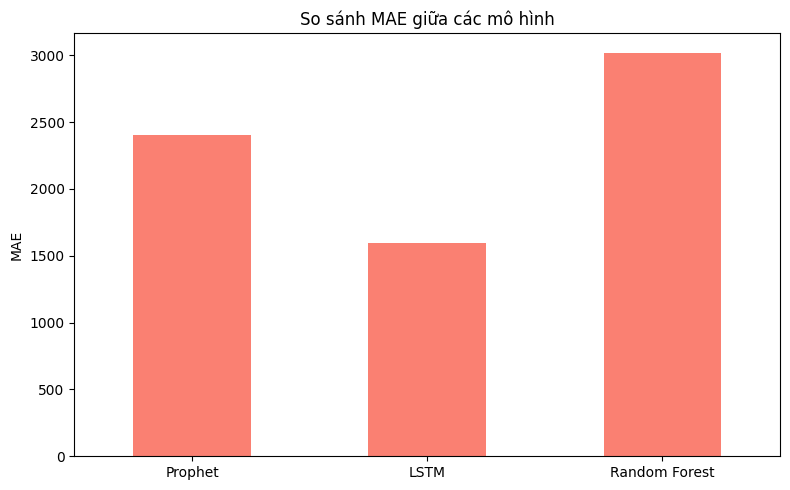

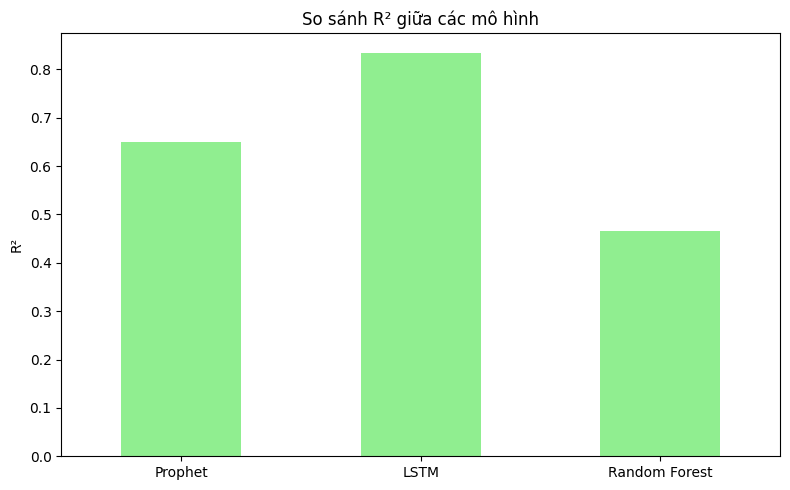

In [ ]:
# Giả sử bạn đã có biến models chứa kết quả
# models = run_models(df)
metrics_df = models['metrics']

# Vẽ biểu đồ RMSE
plt.figure(figsize=(8, 5))
metrics_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('So sánh RMSE giữa các mô hình')
plt.ylabel('RMSE')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('rmse_comparison.png', dpi=300)
plt.show()

# Vẽ biểu đồ MAE
plt.figure(figsize=(8, 5))
metrics_df['MAE'].plot(kind='bar', color='salmon')
plt.title('So sánh MAE giữa các mô hình')
plt.ylabel('MAE')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('mae_comparison.png', dpi=300)
plt.show()

# Vẽ biểu đồ R²
plt.figure(figsize=(8, 5))
metrics_df['R2'].plot(kind='bar', color='lightgreen')
plt.title('So sánh R² giữa các mô hình')
plt.ylabel('R²')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('r2_comparison.png', dpi=300)
plt.show()


### 6.5.dự đoán

Dự đoán 90 ngày tiếp theo:
           ds          yhat
0  2011-12-01  21261.969760
1  2011-12-02  21216.789605
2  2011-12-03  20913.220564
3  2011-12-04  20108.068067
4  2011-12-05  18673.218272
..        ...           ...
85 2012-02-24  17731.884327
86 2012-02-25  17731.975348
87 2012-02-26  17732.074116
88 2012-02-27  17732.176758
89 2012-02-28  17732.277464

[90 rows x 2 columns]


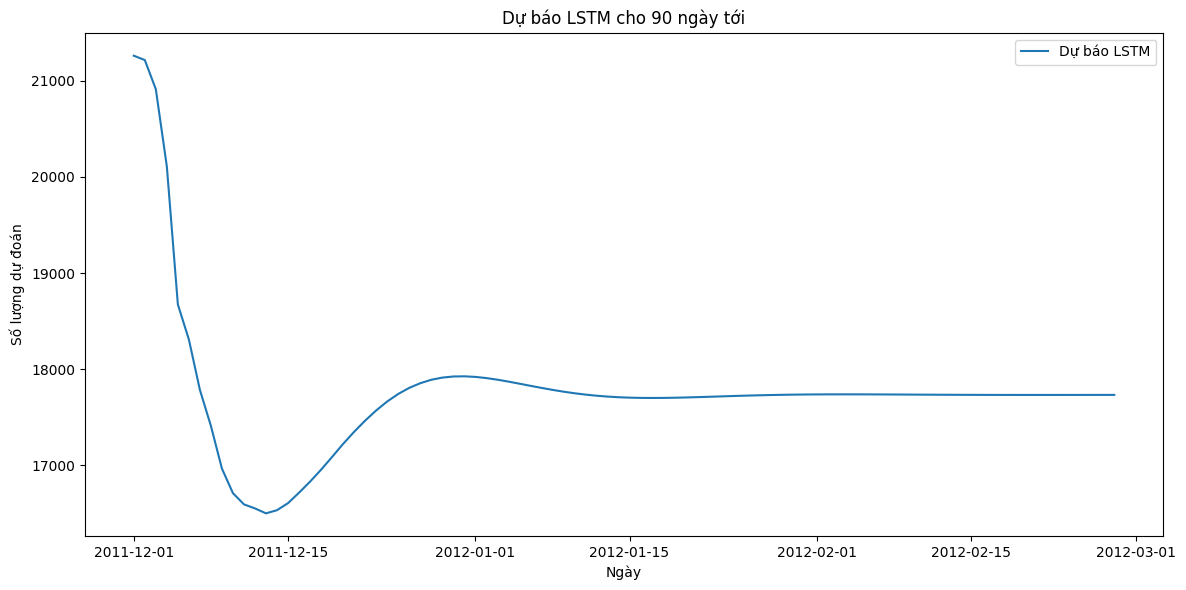

In [ ]:
from datetime import timedelta
def forecast_lstm_future(df, lstm_model, look_back=7, forecast_days=90):
    """Dự đoán 90 ngày tiếp theo bằng mô hình LSTM"""

    # Chuẩn bị dữ liệu từ DataFrame hiện tại
    data = prepare_data_from_existing(df)

    # Chọn các đặc trưng giống như trong hàm create_lstm_model
    features = ['y', 'day_of_week', 'Month_int', 'is_holiday']
    if 'hour' in data.columns:
        features.append('hour')

    # Lấy scaler đã huấn luyện (giả sử đã lưu scaler từ quá trình huấn luyện)
    # Nếu scaler không được lưu, cần tái sử dụng từ hàm create_lstm_model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[features])

    # Tạo dữ liệu tương lai
    last_date = data['ds'].max()
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_days, freq='D')
    future_data = pd.DataFrame({'ds': future_dates})

    # Tạo các đặc trưng cho dữ liệu tương lai
    future_data['day_of_week'] = future_data['ds'].dt.dayofweek
    future_data['Month_int'] = future_data['ds'].dt.month
    future_data['is_holiday'] = future_data['ds'].apply(
        lambda x: 1 if x in holidays.UnitedKingdom(years=x.year) else 0
    )
    if 'hour' in data.columns:
        # Giả sử giá trị trung bình của cột 'hour' từ dữ liệu gốc
        future_data['hour'] = data['hour'].mean()

    # Khởi tạo giá trị 'y' cho dữ liệu tương lai (sẽ được dự đoán)
    future_data['y'] = np.nan

    # Kết hợp dữ liệu hiện tại và tương lai để chuẩn hóa
    combined_data = pd.concat([data[features], future_data[features]], ignore_index=True)
    scaled_combined = scaler.transform(combined_data)

    # Chuẩn bị dữ liệu đầu vào cho dự đoán
    predictions = []
    current_data = scaled_combined[-look_back - forecast_days:-forecast_days].copy()

    for _ in range(forecast_days):
        # Lấy chuỗi look_back cuối cùng
        X = current_data[-look_back:].reshape(1, look_back, len(features))

        # Dự đoán giá trị tiếp theo
        pred = lstm_model.predict(X, verbose=0)

        # Tạo mảng tạm để đảo ngược chuẩn hóa
        pred_inverse = np.zeros((1, len(features)))
        pred_inverse[:, 0] = pred.flatten()

        # Đảo ngược chuẩn hóa
        pred_transformed = scaler.inverse_transform(pred_inverse)[0, 0]

        # Đảo ngược log transform
        pred_final = np.expm1(pred_transformed)

        # Lưu kết quả dự đoán
        predictions.append(pred_final)

        # Cập nhật current_data với giá trị dự đoán
        new_row = current_data[-1].copy()
        new_row[0] = pred[0, 0]  # Cập nhật giá trị y (scaled)
        current_data = np.vstack([current_data, new_row])[1:]

    # Tạo DataFrame kết quả
    forecast_df = pd.DataFrame({
        'ds': future_dates,
        'yhat': predictions
    })

    return forecast_df

# Sử dụng hàm để dự đoán

lstm_model = models['lstm']
forecast_result = forecast_lstm_future(df, lstm_model, look_back=7, forecast_days=90)

# Hiển thị kết quả
print("Dự đoán 90 ngày tiếp theo:")
print(forecast_result)

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 6))
plt.plot(forecast_result['ds'], forecast_result['yhat'], label='Dự báo LSTM')
plt.title('Dự báo LSTM cho 90 ngày tới')
plt.xlabel('Ngày')
plt.ylabel('Số lượng dự đoán')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Tạo cột 'year' và 'month'
forecast_result['year'] = forecast_result['ds'].dt.year
forecast_result['month'] = forecast_result['ds'].dt.month

# Tính tổng theo từng tháng
monthly_total = (
    forecast_result
    .groupby(['year', 'month'])['yhat']
    .sum()
    .reset_index()
    .sort_values(['year', 'month'])
)
# Chuyển 'yhat' thành kiểu số nguyên
monthly_total['yhat'] = monthly_total['yhat'].astype(int)
# Hiển thị tổng của 3 tháng được dự đoán
print("Tổng dự báo cho 3 tháng:")
print(monthly_total)


Tổng dự báo cho 3 tháng:
   year  month    yhat
0  2011     12  552034
1  2012      1  550432
2  2012      2  496553


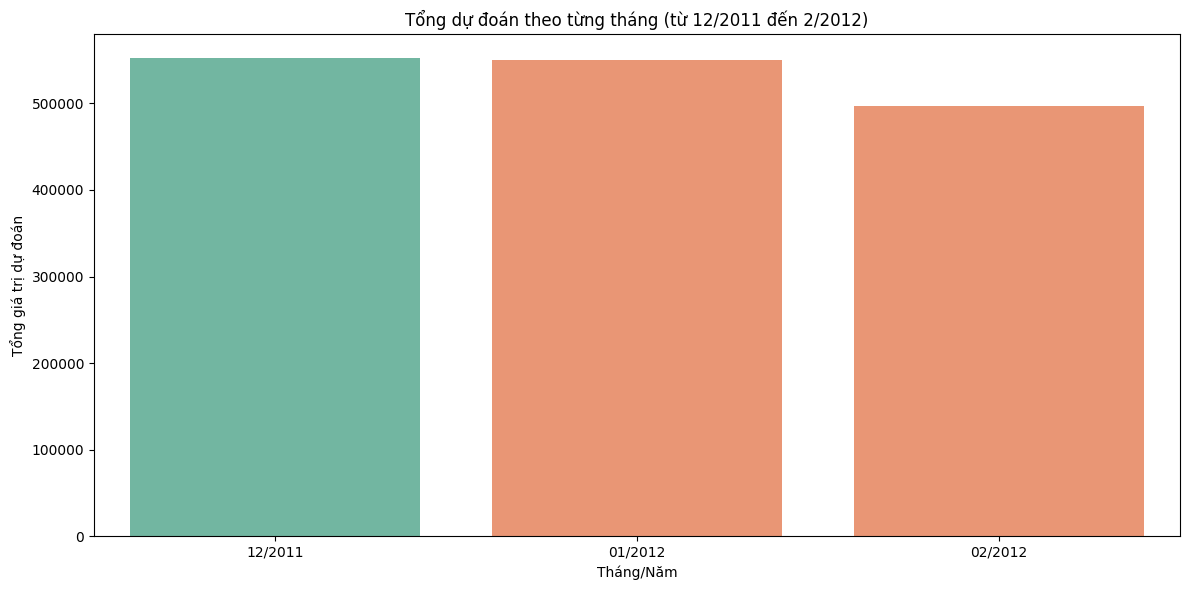

In [ ]:

# Tạo cột thời gian định dạng datetime để sắp thứ tự
monthly_total['year_month'] = pd.to_datetime(monthly_total['year'].astype(str) + '-' + monthly_total['month'].astype(str))

# Tạo nhãn trục x dạng 'MM/YYYY'
monthly_total['month_label'] = monthly_total['year_month'].dt.strftime('%m/%Y')

# Sắp xếp theo thời gian
monthly_total = monthly_total.sort_values('year_month')

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_total, x='month_label', y='yhat', hue='year', palette='Set2')

# Tùy chỉnh trục và chú thích
plt.xlabel('Tháng/Năm')
plt.ylabel('Tổng giá trị dự đoán')
plt.title('Tổng dự đoán theo từng tháng (từ 12/2011 đến 2/2012)')
plt.xticks(rotation=0)
plt.legend().remove()
plt.tight_layout()
plt.show()
